# Movie Series Sub-Project 1: Movie Data Analysis

<p><b>Author</b>: Jingze Dai</p>
<p><b>McMaster University</b>, Honors Computer Science (Coop) student</p>
<p><b>Personal Email Address</b>: <a>david1147062956@gmail.com</a>, or <a>dai.jingze@icloud.com</a></p>
<a href="https://github.com/daijingz">Github Homepage</a>
<a href="https://www.linkedin.com/in/jingze-dai/">Linkedin Webpage</a>
<a href="https://leetcode.com/david1147062956/">Leetcode Webpage</a>

<i>This sub-project analyze the dataset data with obtained visualized observations.</i>

<i>Your Feedback is important for Jingze's further development. If you want to give feedback and suggestions, or you want to participate in working and learning together, please email Jingze at dai.jingze@icloud.com. If you want Jingze to provide contributions to your research or opensource project or you want Jingze to help you with any programming issues, please email Jingze at david1147062956@gmail.com. Thank you for your help.</i>

### <a class="anchor" id=""><b>Section 1</b>: Dataset sources</a>

<b>Name</b>: TMDB 5000 Movie Dataset
<br>
<b>Source</b>: Kaggle
<br>
<b>Download Link</b>: <a href="https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata">TMDB 5000 Movie Dataset</a>

After downloading the compressed folder, unzip it. The expected situation indicates two datasets: <b>tmdb_5000_credits.csv</b> and <b>tmdb_5000_movies.csv</b> Each dataset contains different information.

Putting these two data files in the same folder with this notebook.

<b>Expected Output</b>
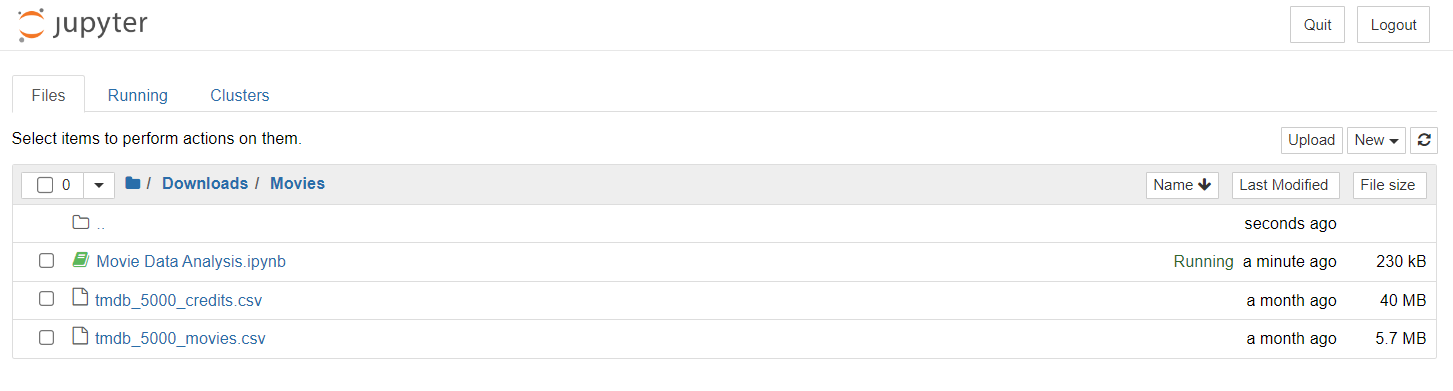

### <a class="anchor" id=""><b>Section 2</b>: Early-stage data observations</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("Existing Datasets: ")
for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        if filename[-4:] == '.csv':
            print(os.path.join(dirname, filename))

Existing Datasets: 
C:\Users\david\Downloads\Movies\tmdb_5000_credits.csv
C:\Users\david\Downloads\Movies\tmdb_5000_movies.csv


<b>Dataset 1 Name</b>: tmdb_5000_credits.csv
<br>
<b>Majority Content</b>: Movie participants' information, including crews and casts.
<br>
<b>Columns</b>: 4

| Columns  | Description   |      Range     | # of Values | All values are unique |
|:------------|-----------------------|:------------------|:----------|----------:|
| **movie_id** |      identifier of movies (have unique values)     |  5, 459K |  4813   |       Yes |
| **title**    |      movie title     |    Complicated   |    4800   |       No |
| **cast**     |      cast information     | Complicated |     4761   |       No |
| **crew**     |      crew information     | Complicated |     4776   |       No |

The identifier of each record is the variable "<b>movie_id</b>", ranges from 5 to 459000 and has the integer type. Variable "title" has string values. Variable "cast" and "crew" combines multiple data types, and they do not have specific value ranges.

In [2]:
credit_dataset_path = 'tmdb_5000_credits.csv'
credit_df = pd.read_csv(credit_dataset_path)
print("Number of rows:", credit_df.shape[0])
print("Number of columns:", credit_df.shape[1])
print("\nColumns:")
print(credit_df.columns)
print("\nData Types:")
print(credit_df.dtypes)

Number of rows: 4803
Number of columns: 4

Columns:
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

Data Types:
movie_id     int64
title       object
cast        object
crew        object
dtype: object


<b>File Name</b>: tmdb_5000_movies.csv
<br>
<b>Majority Content</b>: Movies' basic information, such as content and budgets
<br>
<b>Columns</b>: 20

| Parameter    | Expected Meaning |
| -------- | ------- |
| budget  |  Cost of all fields inside movie production    |
| genres |  Types (Content types) of movies    |
| homepage    |  URL addresses of movies   |
| id    |  Unique identifiers of movies **(UNIQUE)**  |
| keywords    |  List of movie keywords   |
| original_language    |  The original language of movies   |
| original_title   |  The original title of movies   |
| overview    |  Summary of movie content   |
| popularity   |  Popularity of movies   |
| production_companies    |  Production companies   |
| production_countries   |  Production countries   |
| release_date    |  Release date of movies   |
| revenue   |  Total revenue of movies   |
| runtime    |  Movie's duration time (in minutes)   |
| spoken_languages   |  All available languages on movie versions   |
| status   |  Movie's status   |
| tagline   |  Movie's subtitle or hooks   |
| title   |  Official movie titles   |
| vote_average   |  Customer voting average scores   |
| vote_count   |  Amount of movie votings+   |

In [3]:
major_dataset_path = 'tmdb_5000_movies.csv'
major_df = pd.read_csv(major_dataset_path)
print("Number of rows:", major_df.shape[0])
print("Number of columns:", major_df.shape[1])
print("\nColumns:")
print(major_df.columns)
print("\nData Types:")
print(major_df.dtypes)

Number of rows: 4803
Number of columns: 20

Columns:
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Data Types:
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average       

### <a class="anchor" id=""><b>Section 3</b>: Data Analysis (Part 1)</a>

At first, let's find a few records at the beginning (first 5 rows):

In [25]:
print("\nFirst 5 rows of major dataset:")
print(major_df.head())


First 5 rows of major dataset:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...          

In [26]:
print("\nFirst 5 rows of credit dataset:")
print(credit_df.head())


First 5 rows of credit dataset:
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit

Then, before performing normal data analysis, discovering incompleteness, inappropriate values, and conflicts can discover some hidden information inside data. <b>Notice: because this section is about data analysis, there is no need to preprocess or modify data.</b>

In [7]:
import pandas as pd

print("Missing values in each column of the credit data set:")
print(credit_df.isnull().sum())
print("\n")
print("Missing values in each column of the major data set:")
print(major_df.isnull().sum())

Missing values in each column of the credit data set:
movie_id    0
title       0
cast        0
crew        0
dtype: int64


Missing values in each column of the major data set:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


Seems like the credit datset does not have any missing values, but there are a lot of missing information on the major movie information fields. There are 5 features with missing values: `homepage`, `overview`, `release_date`, `runtime`, `tagline`

Then we check whether or not there exists some records with identical values:

In [8]:
credit_duplicate_record = credit_df.duplicated().sum()
print("Creit Dataset Total Records Duplications: " + str(credit_duplicate_record))
major_duplicate_record = major_df.duplicated().sum()
print("Major Dataset Total Records Duplications: " + str(major_duplicate_record))

Creit Dataset Total Records Duplications: 0
Major Dataset Total Records Duplications: 0


Seems like there is no repeated record, however, some features with unique values (e.g., identifiers) cannot allow repeated values. Then we checked these two features: `movie_id` and `id`.

In [9]:
duplicate_rows_1 = credit_df.duplicated(subset=['movie_id']).sum()
print("Duplicated movie_id Rows: " + str(duplicate_rows_1))
duplicate_rows_2 = major_df.duplicated(subset=['id']).sum()
print("Duplicated id Rows: " + str(duplicate_rows_2))

Duplicated movie_id Rows: 0
Duplicated id Rows: 0


By observation, there is no duplication between these identifer values.

### <a class="anchor" id=""><b>Section 4</b>: Data Analysis (Part 2)</a>

Then we discover the range and distribution of meaningful numerical feature values. (including int and float values, IDs do not have any internal meaning).

In this database. there are 6 features with numerical types: `budget`, `popularity`, `revenue`, `runtime`, `vote_average`, and `vote_count`

In [10]:
min_budget = major_df['budget'].min()
max_budget = major_df['budget'].max()
print("Feature `budget` range: [" + str(min_budget) + ", " + str(max_budget) + "]")

Feature `budget` range: [0, 380000000]


In [11]:
min_popularity = major_df['popularity'].min()
max_popularity = major_df['popularity'].max()
print("Feature `popularity` range: [" + str(min_popularity) + ", " + str(max_popularity) + "]")

Feature `popularity` range: [0.0, 875.581305]


In [12]:
min_revenue = major_df['revenue'].min()
max_revenue = major_df['revenue'].max()
print("Feature `revenue` range: [" + str(min_revenue) + ", " + str(max_revenue) + "]")

Feature `revenue` range: [0, 2787965087]


In [13]:
min_runtime = major_df['runtime'].min()
max_runtime = major_df['runtime'].max()
print("Feature `runtime` range: [" + str(min_runtime) + ", " + str(max_runtime) + "]")

Feature `runtime` range: [0.0, 338.0]


In [14]:
min_vote_average = major_df['vote_average'].min()
max_vote_average = major_df['vote_average'].max()
print("Feature `vote_average` range: [" + str(min_vote_average) + ", " + str(max_vote_average) + "]")

Feature `vote_average` range: [0.0, 10.0]


In [15]:
min_vote_count = major_df['vote_count'].min()
max_vote_count = major_df['vote_count'].max()
print("Feature `vote_count` range: [" + str(min_vote_count) + ", " + str(max_vote_count) + "]")

Feature `vote_count` range: [0, 13752]


For these features, we divided each of their distributions in more than 20 equal-size intervals:

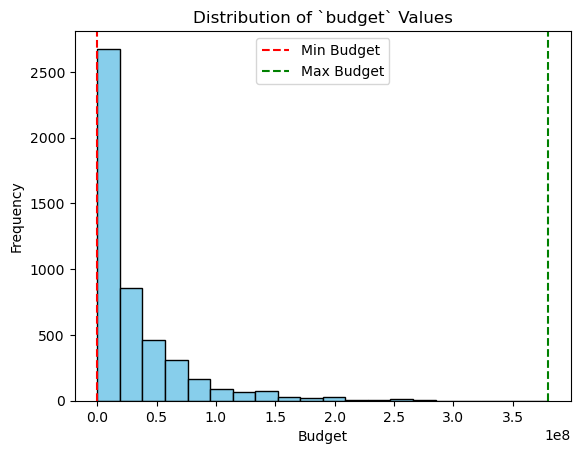

In [16]:
import matplotlib.pyplot as plt

min_budget = major_df['budget'].min()
max_budget = major_df['budget'].max()

plt.hist(major_df['budget'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of `budget` Values')

plt.axvline(x=min_budget, color='red', linestyle='--', label='Min Budget')
plt.axvline(x=max_budget, color='green', linestyle='--', label='Max Budget')

plt.legend()
plt.show()

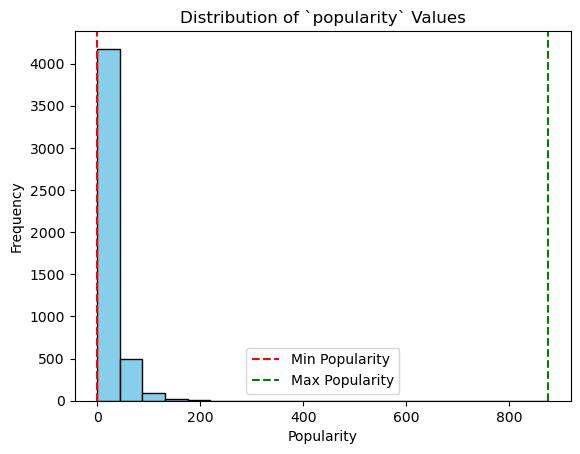

In [17]:
import matplotlib.pyplot as plt

min_popularity = major_df['popularity'].min()
max_popularity = major_df['popularity'].max()

plt.hist(major_df['popularity'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of `popularity` Values')

plt.axvline(x=min_popularity, color='red', linestyle='--', label='Min Popularity')
plt.axvline(x=max_popularity, color='green', linestyle='--', label='Max Popularity')

plt.legend()
plt.show()

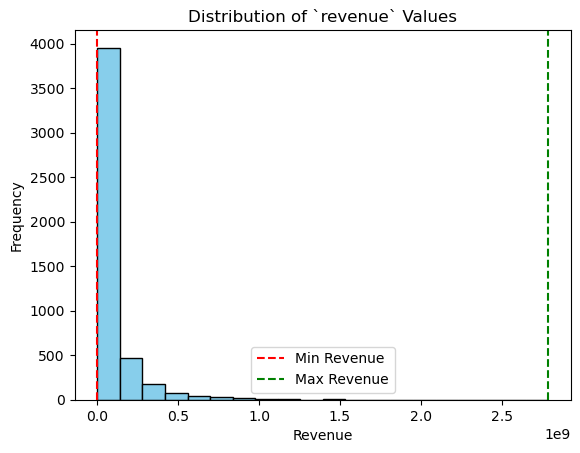

In [18]:
import matplotlib.pyplot as plt

min_revenue = major_df['revenue'].min()
max_revenue = major_df['revenue'].max()

plt.hist(major_df['revenue'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of `revenue` Values')

plt.axvline(x=min_revenue, color='red', linestyle='--', label='Min Revenue')
plt.axvline(x=max_revenue, color='green', linestyle='--', label='Max Revenue')

plt.legend()
plt.show()

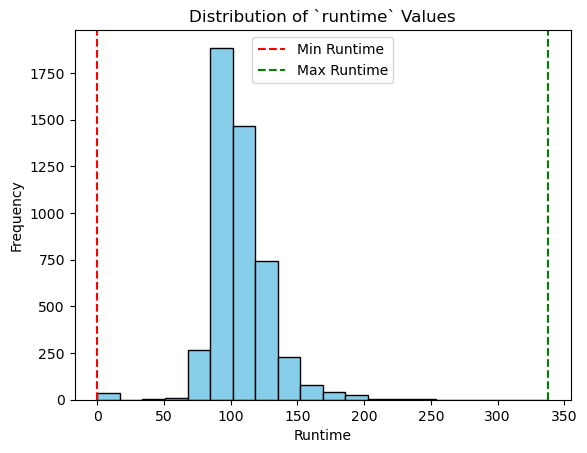

In [19]:
import matplotlib.pyplot as plt

min_runtime = major_df['runtime'].min()
max_runtime = major_df['runtime'].max()

plt.hist(major_df['runtime'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of `runtime` Values')

plt.axvline(x=min_runtime, color='red', linestyle='--', label='Min Runtime')
plt.axvline(x=max_runtime, color='green', linestyle='--', label='Max Runtime')

plt.legend()
plt.show()

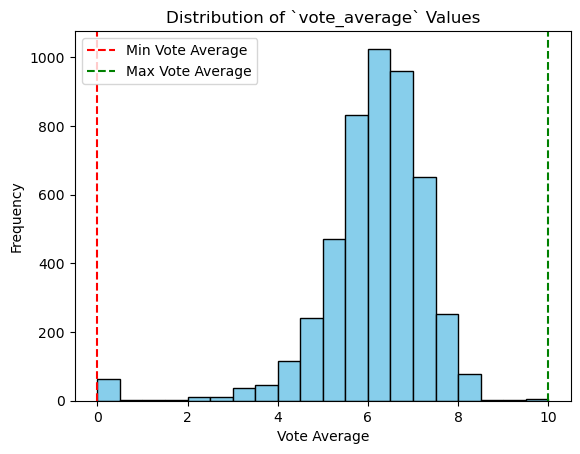

In [20]:
import matplotlib.pyplot as plt

min_vote_average = major_df['vote_average'].min()
max_vote_average = major_df['vote_average'].max()

plt.hist(major_df['vote_average'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Distribution of `vote_average` Values')

plt.axvline(x=min_vote_average, color='red', linestyle='--', label='Min Vote Average')
plt.axvline(x=max_vote_average, color='green', linestyle='--', label='Max Vote Average')

plt.legend()
plt.show()

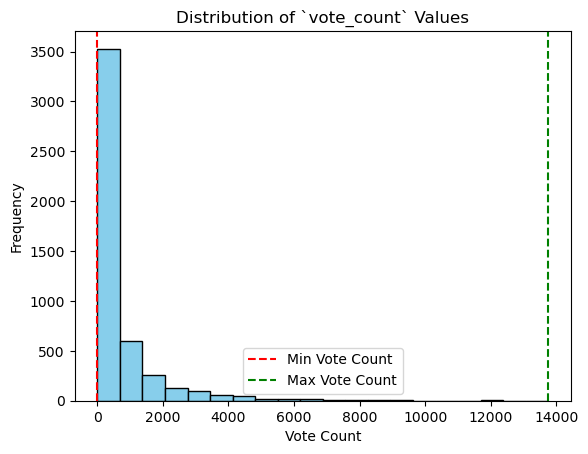

In [21]:
import matplotlib.pyplot as plt

min_vote_count = major_df['vote_count'].min()
max_vote_count = major_df['vote_count'].max()

plt.hist(major_df['vote_count'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.title('Distribution of `vote_count` Values')

plt.axvline(x=min_vote_count, color='red', linestyle='--', label='Min Vote Count')
plt.axvline(x=max_vote_count, color='green', linestyle='--', label='Max Vote Count')

plt.legend()
plt.show()

Then we discover some summary statistics on all numerical values

In [23]:
print("\nSummary Statistics for Numerical Columns (Credit Dataset):")
print(credit_df.describe())


Summary Statistics for Numerical Columns (Credit Dataset):
            movie_id
count    4803.000000
mean    57165.484281
std     88694.614033
min         5.000000
25%      9014.500000
50%     14629.000000
75%     58610.500000
max    459488.000000


In [24]:
print("\nSummary Statistics for Numerical Columns (Major Dataset):")
print(major_df.describe())


Summary Statistics for Numerical Columns (Major Dataset):
             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000   

### <a class="anchor" id=""><b>Section 5</b>: Data Analysis (Part 3)</a>

In the next step, our goal is to find all possible values of character-based columns (whose values are repeatable). Combined values' columns (e.g., lists) and meaningless columns (e.g., identifiers) are not included inside.

Notice that some columns below perform data removals from repeated values.

In [13]:
possible_genres = major_df['genres'].unique()
print("\nOccurred Genres:", possible_genres)


Occurred Genres: ['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]'
 ...
 '[{"id": 53, "name": "Thriller"}, {"id": 27, "name": "Horror"}, {"id": 35, "name": "Comedy"}]'
 '[{"id": 10769, "name": "Foreign"}, {"id": 53, "name": "Thriller"}]'
 '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]']


In [17]:
import ast

unique_genres = {}

for index, row in major_df.iterrows():
    genres_list = ast.literal_eval(row['genres'])
    for genre_dict in genres_list:
        genre_id = genre_dict['id']
        genre_name = genre_dict['name']
        
        unique_genres[genre_id] = genre_name

print("Unique Genres:")
for genre_id, genre_name in unique_genres.items():
    print("ID:", genre_id, "- Name:", genre_name)

Unique Genres:
ID: 28 - Name: Action
ID: 12 - Name: Adventure
ID: 14 - Name: Fantasy
ID: 878 - Name: Science Fiction
ID: 80 - Name: Crime
ID: 18 - Name: Drama
ID: 53 - Name: Thriller
ID: 16 - Name: Animation
ID: 10751 - Name: Family
ID: 37 - Name: Western
ID: 35 - Name: Comedy
ID: 10749 - Name: Romance
ID: 27 - Name: Horror
ID: 9648 - Name: Mystery
ID: 36 - Name: History
ID: 10752 - Name: War
ID: 10402 - Name: Music
ID: 99 - Name: Documentary
ID: 10769 - Name: Foreign
ID: 10770 - Name: TV Movie


In [5]:
possible_keywords = major_df['keywords'].unique()
print("\nOccurred Keywords:", possible_keywords)


Occurred Keywords: ['[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'
 '[{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one\'s life"}, {"id": 2052, "name": "traitor"}, {"id"

In [16]:
import ast

unique_keywords = {}

for index, row in major_df.iterrows():
    keywords_list = ast.literal_eval(row['keywords'])
    for keywords_dict in keywords_list:
        keywords_id = keywords_dict['id']
        keywords_name = keywords_dict['name']
        
        unique_keywords[keywords_id] = keywords_name

print("Unique Keywords:")
for keywords_id, keywords_name in unique_keywords.items():
    print("ID:", keywords_id, "- Name:", keywords_name)
    
print("\nTotal Keywords: " + str(len(unique_keywords.items())))

Unique Keywords:
ID: 1463 - Name: culture clash
ID: 2964 - Name: future
ID: 3386 - Name: space war
ID: 3388 - Name: space colony
ID: 3679 - Name: society
ID: 3801 - Name: space travel
ID: 9685 - Name: futuristic
ID: 9840 - Name: romance
ID: 9882 - Name: space
ID: 9951 - Name: alien
ID: 10148 - Name: tribe
ID: 10158 - Name: alien planet
ID: 10987 - Name: cgi
ID: 11399 - Name: marine
ID: 13065 - Name: soldier
ID: 14643 - Name: battle
ID: 14720 - Name: love affair
ID: 165431 - Name: anti war
ID: 193554 - Name: power relations
ID: 206690 - Name: mind and soul
ID: 209714 - Name: 3d
ID: 270 - Name: ocean
ID: 726 - Name: drug abuse
ID: 911 - Name: exotic island
ID: 1319 - Name: east india trading company
ID: 2038 - Name: love of one's life
ID: 2052 - Name: traitor
ID: 2580 - Name: shipwreck
ID: 2660 - Name: strong woman
ID: 3799 - Name: ship
ID: 5740 - Name: alliance
ID: 5941 - Name: calypso
ID: 6155 - Name: afterlife
ID: 6211 - Name: fighter
ID: 12988 - Name: pirate
ID: 157186 - Name: swashb

In [17]:
possible_ol = major_df['original_language'].unique()
print("\nOccurred Original Language:", possible_ol)
print("\nTotal Original Language: " + str(len(possible_ol)))


Occurred Original Language: ['en' 'ja' 'fr' 'zh' 'es' 'de' 'hi' 'ru' 'ko' 'te' 'cn' 'it' 'nl' 'ta'
 'sv' 'th' 'da' 'xx' 'hu' 'cs' 'pt' 'is' 'tr' 'nb' 'af' 'pl' 'he' 'ar'
 'vi' 'ky' 'id' 'ro' 'fa' 'no' 'sl' 'ps' 'el']

Total Original Language: 37


In [8]:
possible_company = major_df['production_companies'].unique()
print("\nOccurred Production Companies:", possible_company)


Occurred Production Companies: ['[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'
 '[{"name": "Walt Disney Pictures", "id": 2}, {"name": "Jerry Bruckheimer Films", "id": 130}, {"name": "Second Mate Productions", "id": 19936}]'
 '[{"name": "Columbia Pictures", "id": 5}, {"name": "Danjaq", "id": 10761}, {"name": "B24", "id": 69434}]'
 ...
 '[{"name": "Asylum Films", "id": 10571}, {"name": "FM Entertainment", "id": 26598}, {"name": "Eagle Eye Films Inc.", "id": 40739}]'
 '[{"name": "Front Street Pictures", "id": 3958}, {"name": "Muse Entertainment Enterprises", "id": 6438}]'
 '[{"name": "rusty bear entertainment", "id": 87986}, {"name": "lucky crow films", "id": 87987}]']


In [7]:
import ast

unique_production_companies = {}

for index, row in major_df.iterrows():
    production_companies_list = ast.literal_eval(row['production_companies'])
    for production_companies_dict in production_companies_list:
        production_companies_id = production_companies_dict['id']
        production_companies_name = production_companies_dict['name']
        
        unique_production_companies[production_companies_id] = production_companies_name

print("Unique Production Companies:")
for production_companies_id, production_companies_name in unique_production_companies.items():
    print("ID:", production_companies_id, "- Name:", production_companies_name)
    
print("\nTotal Production Companies: " + str(len(unique_production_companies.items())))

Unique Production Companies:
ID: 289 - Name: Ingenious Film Partners
ID: 306 - Name: Twentieth Century Fox Film Corporation
ID: 444 - Name: Dune Entertainment
ID: 574 - Name: Lightstorm Entertainment
ID: 2 - Name: Walt Disney Pictures
ID: 130 - Name: Jerry Bruckheimer Films
ID: 19936 - Name: Second Mate Productions
ID: 5 - Name: Columbia Pictures
ID: 10761 - Name: Danjaq
ID: 69434 - Name: B24
ID: 923 - Name: Legendary Pictures
ID: 6194 - Name: Warner Bros.
ID: 9993 - Name: DC Entertainment
ID: 9996 - Name: Syncopy
ID: 326 - Name: Laura Ziskin Productions
ID: 19551 - Name: Marvel Enterprises
ID: 6125 - Name: Walt Disney Animation Studios
ID: 420 - Name: Marvel Studios
ID: 15357 - Name: Prime Focus
ID: 76043 - Name: Revolution Sun Studios
ID: 7364 - Name: Heyday Films
ID: 429 - Name: DC Comics
ID: 507 - Name: Atlas Entertainment
ID: 9995 - Name: Cruel & Unusual Films
ID: 41624 - Name: RatPac-Dune Entertainment
ID: 9168 - Name: Bad Hat Harry Productions
ID: 7576 - Name: Eon Productions
ID

In [10]:
possible_country = major_df['production_countries'].unique()
print("\nOccurred Production Countries:", possible_country)


Occurred Production Countries: ['[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'
 '[{"iso_3166_1": "US", "name": "United States of America"}]'
 '[{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]'
 '[{"iso_3166_1": "JM", "name": "Jamaica"}, {"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "BS", "name": "Bahamas"}, {"iso_3166_1": "DM", "name": "Dominica"}]'
 '[{"iso_3166_1": "CZ", "name": "Czech Republic"}, {"iso_3166_1": "PL", "name": "Poland"}, {"iso_3166_1": "SI", "name": "Slovenia"}, {"iso_3166_1": "US", "name": "United States of America"}]'
 '[{"iso_3166_1": "NZ", "name": "New Zealand"}, {"iso_3166_1": "US", "name": "United States of America"}]'
 '[{"iso_3166_1": "NZ", "name": "New Zealand"}, {"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "DE", "name": "Germany"}]'
 '[{"iso_3166_1": "CN", "name": "China"}, {"iso_3166_

In [8]:
import ast

unique_production_countries = {}

for index, row in major_df.iterrows():
    production_countries_list = ast.literal_eval(row['production_countries'])
    for production_countries_dict in production_countries_list:
        production_countries_id = production_countries_dict['iso_3166_1']
        production_countries_name = production_countries_dict['name']
        
        unique_production_countries[production_countries_id] = production_countries_name

print("Unique Production Countries:")
for production_countries_id, production_countries_name in unique_production_countries.items():
    print("ID:", production_countries_id, "- Name:", production_countries_name)

print("\nTotal Production Countries: " + str(len(unique_production_countries.items())))

Unique Production Countries:
ID: US - Name: United States of America
ID: GB - Name: United Kingdom
ID: JM - Name: Jamaica
ID: BS - Name: Bahamas
ID: DM - Name: Dominica
ID: CZ - Name: Czech Republic
ID: PL - Name: Poland
ID: SI - Name: Slovenia
ID: NZ - Name: New Zealand
ID: DE - Name: Germany
ID: CN - Name: China
ID: CA - Name: Canada
ID: IT - Name: Italy
ID: JP - Name: Japan
ID: MT - Name: Malta
ID: AU - Name: Australia
ID: FR - Name: France
ID: BE - Name: Belgium
ID: IN - Name: India
ID: NL - Name: Netherlands
ID: ES - Name: Spain
ID: AE - Name: United Arab Emirates
ID: HK - Name: Hong Kong
ID: TW - Name: Taiwan
ID: IE - Name: Ireland
ID: MA - Name: Morocco
ID: HU - Name: Hungary
ID: SG - Name: Singapore
ID: NO - Name: Norway
ID: SE - Name: Sweden
ID: ZA - Name: South Africa
ID: RU - Name: Russia
ID: RO - Name: Romania
ID: MX - Name: Mexico
ID: MC - Name: Monaco
ID: CH - Name: Switzerland
ID: PK - Name: Pakistan
ID: MY - Name: Malaysia
ID: FI - Name: Finland
ID: IS - Name: Iceland
I

In [12]:
possible_sl = major_df['spoken_languages'].unique()
print("\nOccurred Spoken Language:", possible_sl)


Occurred Spoken Language: ['[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'
 '[{"iso_639_1": "en", "name": "English"}]'
 '[{"iso_639_1": "fr", "name": "Fran\\u00e7ais"}, {"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}, {"iso_639_1": "it", "name": "Italiano"}, {"iso_639_1": "de", "name": "Deutsch"}]'
 '[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "fr", "name": "Fran\\u00e7ais"}]'
 '[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "fr", "name": "Fran\\u00e7ais"}, {"iso_639_1": "de", "name": "Deutsch"}]'
 '[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}, {"iso_639_1": "it", "name": "Italiano"}, {"iso_639_1": "fr", "name": "Fran\\u00e7ais"}, {"iso_639_1": "de", "name": "Deutsch"}]'
 '[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "tr", "name": "T\\u00fcrk\\u00e7e"}, {"iso_639_1": "el", "name": "\\u03b5\\u03bb\\u03bb\\u03b7\\u03bd\\u03b9\\u03ba\\u03ac"}

In [9]:
import ast

unique_spoken_languages = {}

for index, row in major_df.iterrows():
    spoken_languages_list = ast.literal_eval(row['spoken_languages'])
    for spoken_languages_dict in spoken_languages_list:
        spoken_languages_id = spoken_languages_dict['iso_639_1']
        spoken_languages_name = spoken_languages_dict['name']
        
        unique_spoken_languages[spoken_languages_id] = spoken_languages_name

print("Unique Spoken Language:")
for spoken_languages_id, spoken_languages_name in unique_spoken_languages.items():
    print("ID:", spoken_languages_id, "- Name:", spoken_languages_name)
    
print("\nTotal Spoken Language: " + str(len(unique_spoken_languages.items())))

Unique Spoken Language:
ID: en - Name: English
ID: es - Name: Español
ID: fr - Name: Français
ID: it - Name: Italiano
ID: de - Name: Deutsch
ID: tr - Name: Türkçe
ID: el - Name: ελληνικά
ID: zh - Name: 普通话
ID: th - Name: ภาษาไทย
ID: is - Name: Íslenska
ID: ru - Name: Pусский
ID: sv - Name: svenska
ID: ro - Name: Română
ID: ja - Name: 日本語
ID: la - Name: Latin
ID: hi - Name: हिन्दी
ID: pt - Name: Português
ID: bo - Name: 
ID: fa - Name: فارسی
ID: ur - Name: اردو
ID: ar - Name: العربية
ID: sa - Name: 
ID: gd - Name: 
ID: cs - Name: Český
ID: cn - Name: 广州话 / 廣州話
ID: ko - Name: 한국어/조선말
ID: no - Name: Norsk
ID: ta - Name: தமிழ்
ID: nv - Name: 
ID: he - Name: עִבְרִית
ID: da - Name: Dansk
ID: nl - Name: Nederlands
ID: af - Name: Afrikaans
ID: ga - Name: Gaeilge
ID: so - Name: Somali
ID: fi - Name: suomi
ID: sw - Name: Kiswahili
ID: bg - Name: български език
ID: yi - Name: 
ID: vi - Name: Tiếng Việt
ID: hu - Name: Magyar
ID: uk - Name: Український
ID: eo - Name: Esperanto
ID: am - Name: 
ID: 

Some of displayed language values does not have names, but their **ids** are unique. 

In [18]:
possible_status = major_df['status'].unique()
print("\nOccurred Statis:", possible_status)


Occurred Statis: ['Released' 'Post Production' 'Rumored']


### <a class="anchor" id=""><b>Section 6</b>: Data Analysis (Part 4)</a>

In this section, we study the binary relationships and distributions between two different numerical values.

At first, let's find distributions between movie popularity and revenue.

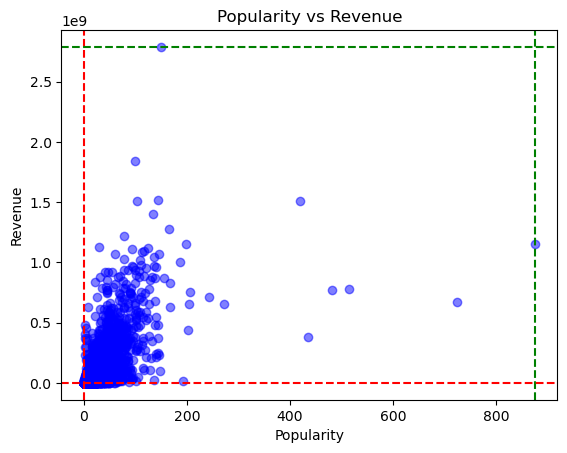

In [19]:
import matplotlib.pyplot as plt

plt.scatter(major_df['popularity'], major_df['revenue'], color='blue', alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Popularity vs Revenue')

plt.axvline(x=major_df['popularity'].min(), color='red', linestyle='--', label='Min Popularity')
plt.axvline(x=major_df['popularity'].max(), color='green', linestyle='--', label='Max Popularity')
plt.axhline(y=major_df['revenue'].min(), color='red', linestyle='--', label='Min Revenue')
plt.axhline(y=major_df['revenue'].max(), color='green', linestyle='--', label='Max Revenue')

plt.show()

In [20]:
records_nonnull = major_df[(major_df['popularity'].notna()) & (major_df['revenue'].notna())]
num_records_nonnull = len(records_nonnull)
records_within_conditions = major_df[(major_df['popularity'] <= 200) & (major_df['revenue'] <= 1.0)]
num_records_within_conditions = len(records_within_conditions)

print("Number of records with popularity <= 200 and revenue <= 1.0:", num_records_within_conditions)
print("Percentage: ", num_records_within_conditions/num_records_nonnull)

Number of records with popularity <= 200 and revenue <= 1.0: 1427
Percentage:  0.29710597543202166


By observastion,